In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, fbeta_score
from sklearn.metrics import plot_confusion_matrix
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/simran.tyagi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
%run ./_preprocess.ipynb

#ds_root = '/home/gaurav.gupta/projects/PoCs/brandMention/brand_datasets/'
#r_path = os.path.join(ds_root, 'ds_complaints', 'panasonic_random_sample_predicted.csv')
#r_df = read_file(r_path)

#m_path = os.path.join(ds_root, 'ds_complaints', 'panasonic_v1_g.csv')
#m_df = read_file(m_path)

#raw_df = pd.concat([r_df, m_df])
#raw_df.reset_index(drop=True, inplace=True)
raw_df = pd.read_csv('/home/simran.tyagi/Downloads/panasonic_v1_f.csv')

options = {
    'handle_unicode': True,
    'handle_emoji': True,
    'handle_email': True,
    'handle_username': True,
    'handle_hashtags': True,
    'handle_url': True,
    'handle_markup': True,
    'handle_retweet': True,
    'handle_case': True,
    'handle_lemmatization': True,
    'handle_stopwords': True,
    'handle_punctuation': True,
    'handle_contractions': True,
    'print_stats': True
}
df = process_data(raw_df, **options)

# replace placeholders.
df.text = df.text.str.replace('HASHTAG', '', )
df.text = df.text.str.replace('HANDLE', '')
df.text = df.text.str.replace('URL', '')
df.text = df.text.str.replace('rt', '')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/simran.tyagi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


------------------  -----------  ------------
Step                Total words  Unique words
Start               77684        20298
Remove Retweet      66365        18469
Lower               66365        16577
Remove Retweet      66649        16528
Lemmatize           66649        15775
Unicode Fix         66656        15752
Replace emoji       67043        15848
Stop words          50235        15273
Email Replace       50235        15266
UserName replace    50921        14248
HashTags Replace    64615        10461
URL Replace         64615        8398
MARKUP Replace      64615        8397
Remove punctuation  64615        6668
------------------  -----------  ------------


In [3]:
tfidf = TfidfVectorizer(lowercase=False, max_df=.8, min_df=0.01, ngram_range=(1, 2))  
tfidf_wm = tfidf.fit_transform(df['text']).toarray() 
print(tfidf_wm.shape)
x_train, x_test, y_train, y_test = train_test_split(tfidf_wm, df['Complaint'], random_state = 42) 


(2421, 233)


---------------  -----------------
Metric           Score
Accuracy         93.72937293729373
F1 Score         80.41237113402062
F-Beta Score     86.8596881959911
Precision Score  71.55963302752293
Recall Score     91.76470588235294
---------------  -----------------


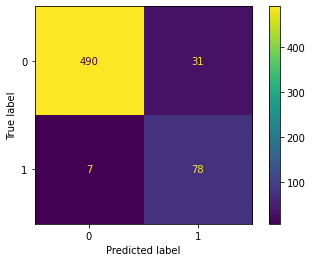

In [52]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from tabulate import tabulate


def test_model(model):
    pred_test = model.predict(x_test)
    model_acc_score = accuracy_score(y_test, pred_test)
    model_f1_score = f1_score(y_test, pred_test)
    model_prec_score = precision_score(y_test, pred_test)
    model_recall_score = recall_score(y_test, pred_test)
    model_f2_score = fbeta_score(y_test, pred_test, beta=2)
    results = []
    results.append(('Metric',   'Score'))
    results.append(('Accuracy', model_acc_score*100))
    results.append(('F1 Score', model_f1_score*100))
    results.append(('F-Beta Score', model_f2_score*100))
    results.append(('Precision Score', model_prec_score*100))
    results.append(('Recall Score', model_recall_score*100))
    print(tabulate(results))
    return pred_test

model = BernoulliNB(alpha = 0.1)
#model = MultinomialNB(alpha = 0.7)
model.fit(x_train, y_train)
pred_test = test_model(model)
plot_confusion_matrix(model, x_test, y_test)


In [50]:
model.get_params()

{'alpha': 0.1, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [36]:
import shutil
%run ./_preprocess.ipynb

root = '/home/simran.tyagi/Desktop/brand_ml'
model_dict = OrderedDict({'classifier': model, 'vectorizer': tfidf})
# experiment_name = "<Algo_name>_<MetricName>_<NGrams>_<MetricValue>_<date>"
experiment_name = "BNB_FBeta_Biigram_8685_Jan05"
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
experiment_results = {
    "tn": float(tn), "fp": float(fp), "fn": float(fn), "tp": float(tp),
    "model_acc_score": float(accuracy_score(y_test, pred_test)),
    "model_f1_score": float(f1_score(y_test, pred_test)),
    "model_prec_score": float(precision_score(y_test, pred_test)),
    "model_recall_score": float(recall_score(y_test, pred_test)),
    "model_f2_score": float(fbeta_score(y_test, pred_test, beta=2)),
}

notes = {'details': ['Uni Model', 'BernoulliNB']}

# SAVE THE EXPERIMENT ARTIFACTS
shutil.rmtree(os.path.join(root, 'experiments',
              experiment_name), ignore_errors=True)
save_experiment(experiment_name, model_dict, tags=notes,
                results=experiment_results, preprocess_details=options)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/simran.tyagi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
